In [2]:
import torch
import torch.nn as nn

#import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

#import plot funcs
import matplotlib.pyplot as plt

## 1. Getting Dataset

we're gonna use the FashionMNIST dataset and import it using the built in datasets from torchvision

In [3]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [4]:
len(train_data), len(test_data)

(60000, 10000)

### 1.1 Checking Data Shape

In [5]:
#see first training example
img, label = train_data[0]
img, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
#check image shape
img.shape

torch.Size([1, 28, 28])

In [9]:
#img classication
label, class_names[label]

(9, 'Ankle boot')

### 1.2 Visualizing Data

Image shape: torch.Size([1, 28, 28])


(torch.Size([28, 28]), torch.Size([1, 28, 28]))

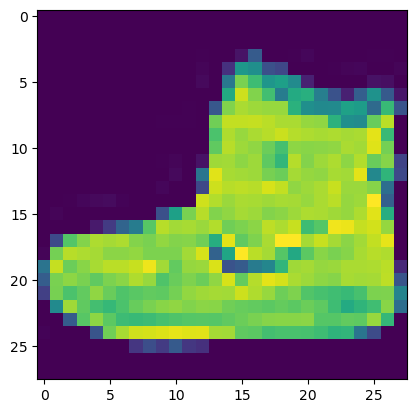

In [10]:
import matplotlib.pyplot as plt

img, label = train_data[0]
print(f"Image shape: {img.shape}")
plt.imshow(img.squeeze())
img.squeeze().shape, img.shape

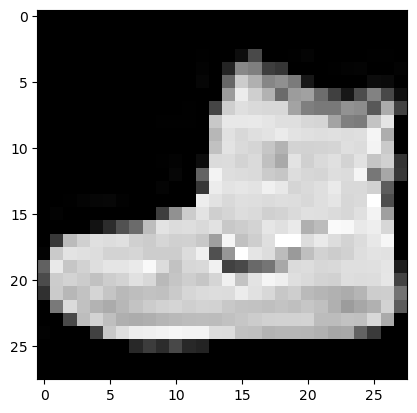

In [11]:
plt.imshow(img.squeeze(), cmap="gray")

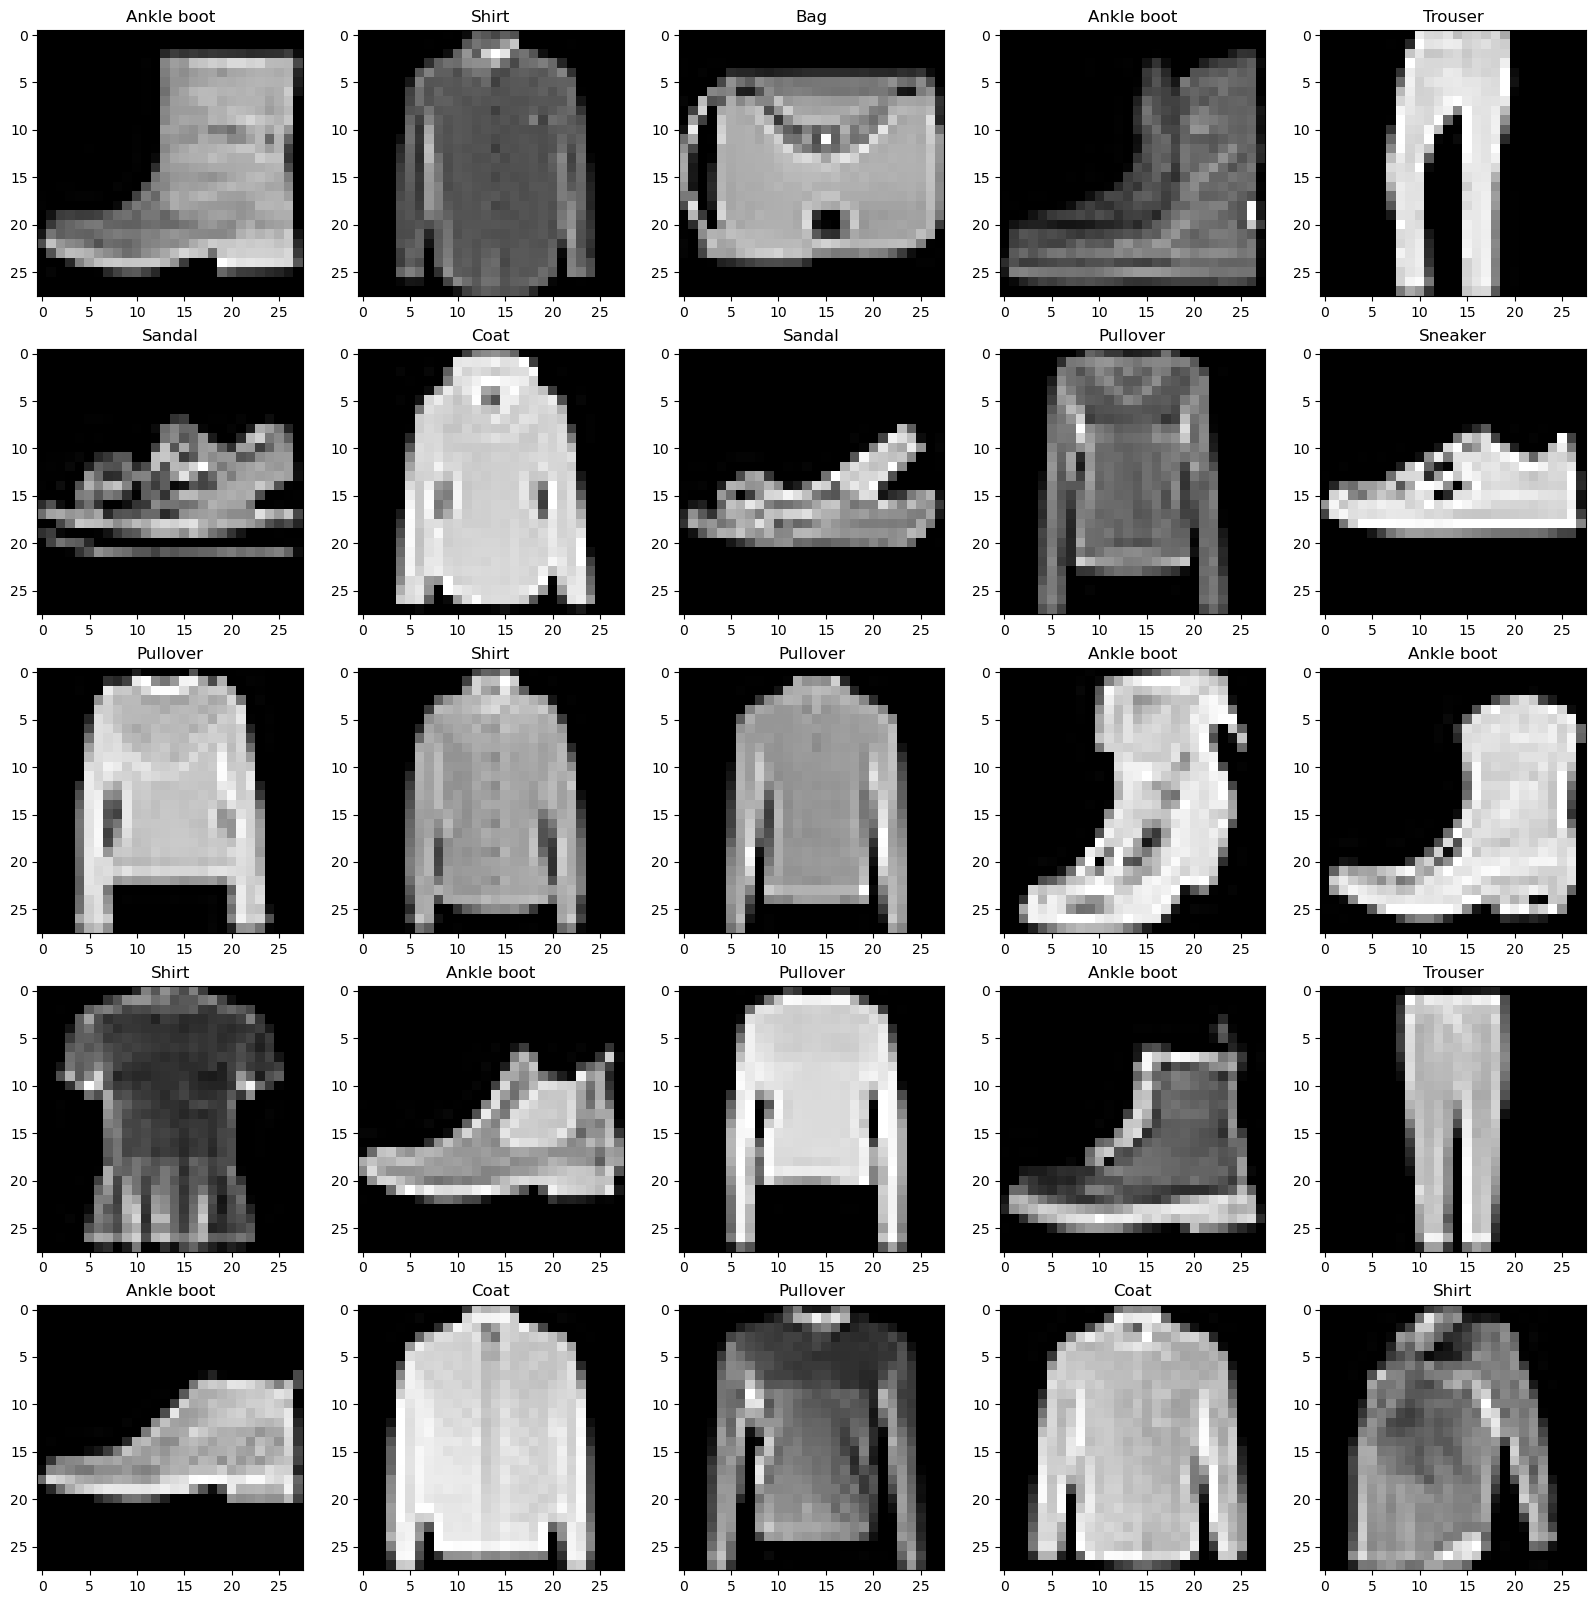

In [12]:
#plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(20,20))

rows, cols = 5,5
for  i in range(1, rows * cols+1):
    random_idx = torch.randint(0, len(train_data), size = [1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])



## 2. Prepare DataLoader

right now our data is in the form of PyTorch Datasets

dataloader turns ut dataset into a python iterable

more specifically, we cant to turn out data into batches (or mini-batches)

we do this because:

1. it is more computationally efficient to break our dataset into smaller batches
2. it gives our NN more changes to update its gradients per epoch




In [13]:
from torch.utils.data import DataLoader

#setup batch size hyperparameter
BATCH_SIZE = 32 

#turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data, 
                              batch_size=BATCH_SIZE, 
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data, 
                              batch_size=BATCH_SIZE, 
                              shuffle=False)
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x169b5baf0>,
 <torch.utils.data.dataloader.DataLoader at 0x169b59db0>)

In [14]:
#check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of train_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x169b5baf0>, <torch.utils.data.dataloader.DataLoader object at 0x169b59db0>)
Length of train_dataloader: 1875 batches of 32
Length of train_dataloader: 313 batches of 32


In [15]:
#checkout whats inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 1, label size: torch.Size([])


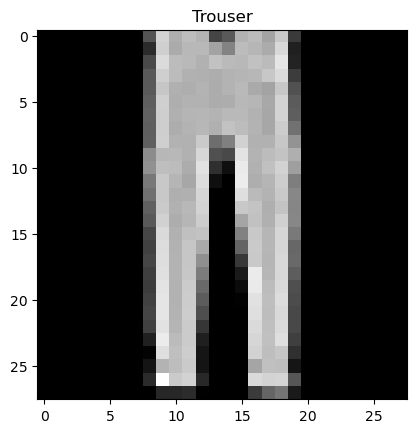

In [16]:
#show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Building a Baseline Model

when making ML models, it's best practice to make a baseline model

a baseline model is a simple model that we'll try to improve upon with subsequent models

we start simple and add complexity when necessary

In [17]:
#create a flatten layer
flatten_model = nn.Flatten()

#get a single sample
x = train_features_batch[0]

#flatten sample
output = flatten_model(x)

print(f"OG Shape: {x.shape}")
print(f"Shape after flattening: {output.shape}")
x, output

OG Shape: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0196, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0157, 0.0000, 0.0157, 0.0039, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0039,
           0.0000, 0.1490, 0.4667, 0.5098, 0.5373, 0.4941, 0.4824, 0.5137,
           0.5490, 0.5137, 0.1294, 0.0000, 0.0039, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0118, 0.0039, 0.0157, 0.0000,
           0.2353, 0.5255, 0.1765, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0235, 0.1686, 0.4745, 0.3647, 

In [18]:
from torch import nn
class fasionMNISTModel(nn.Module):
    def __init__(self, 
                 input_shape: int,
                 hidden_units: int,
                 output_shape = int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),

            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [19]:
#create instance
torch.manual_seed(42)

model0 = fasionMNISTModel(input_shape=784, #pixels in 28 x 28 img 
                          hidden_units=8, #units in hidden layer
                          output_shape=len(class_names)) #output probabilities for every class

model0

fasionMNISTModel(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=10, bias=True)
  )
)

In [20]:
test_x = torch.rand([1,1,28,28])
model0(test_x)

tensor([[ 0.2306, -0.4151, -0.3436, -0.3989, -0.2214,  0.0647,  0.3306,  0.0571,
          0.0713,  0.2716]], grad_fn=<AddmmBackward0>)

## 3.1 Setup Loss, Optimizer, and Evaluation Metrics

* Loss Func - since we're workign with multi-class data, our loss function will be `nn.CrossEntropyLoss()`
* Optimizer - `torch.optim.SGD()`
* Eval Metric - since we're using classification, we'll use accuracy as our optimization metric

In [21]:
from helper_functions import accuracy_fn

#set up loss func and optimizer
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model0.parameters(),
                            lr = 0.01)

In [22]:
#create a function to time how long our model takes
from timeit import default_timer as timer

def print_train_time(start:float, 
                     end:float, 
                     device: torch.device = None):
    """
    prints difference between start and end time
    """
    total_time = end-start
    print(f"Train time on: {device}: {total_time} seconds")
    return total_time

### 3.3 Creating a Training Loop on Batches of Data

1. Loop through Epochs
2. Loop through training batches, perform training steps, calculate the train loss per batch
3. Loop through the testing batches, perform testing steps, calculate the test loss per batch
4. Print out what's happening
5. Time our model

In [23]:
#import tgdm progress bar
from tqdm.auto import tqdm

#set seed and start timer
torch.manual_seed(42)
torch.cuda.manual_seed(42)

train_time_start_cpu = timer()

#set number of epochs (we'll keep this small for training time)
epochs = 5

#create training and test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n")

    #Training
    train_loss = 0
    #add loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model0.train()

        #1. forward step
        train_pred = model0(X)

        #2. calc loss
        loss = loss_fn(train_pred, y)
        train_loss += loss
        
        #3. optim zero grad
        optimizer.zero_grad()

        #4. back prop
        loss.backward()

        #5. optim step
        optimizer.step()

        if (batch % 100) == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")        

    #divide total train loss by length of train dataloader
    train_loss /= len(train_dataloader)

    ###Testing
    test_loss = 0
    test_acc = 0
    model0.eval()
    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            #1. forward pass
            test_pred = model0(X_test)

            #2. calculate loss
            test_loss += loss_fn(test_pred, y_test)

            #3. calculate accuracy
            test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

        test_loss /= len(test_data)
        test_loss /= len(test_dataloader)
    #print out whats happenign
    print(f"\nTrain Loss: {train_loss} | Test Loss: {test_loss}, Test Acc = {test_acc}")

train_time_end_cpu = timer()

total_train_time_mod_0 = print_train_time(start = train_time_start_cpu,
                                          end = train_time_end_cpu,
                                          device=str(next(model0.parameters())))

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0

Looked at 0/60000 samples.
Looked at 3200/60000 samples.
Looked at 6400/60000 samples.
Looked at 9600/60000 samples.
Looked at 12800/60000 samples.
Looked at 16000/60000 samples.
Looked at 19200/60000 samples.
Looked at 22400/60000 samples.
Looked at 25600/60000 samples.
Looked at 28800/60000 samples.
Looked at 32000/60000 samples.
Looked at 35200/60000 samples.
Looked at 38400/60000 samples.
Looked at 41600/60000 samples.
Looked at 44800/60000 samples.
Looked at 48000/60000 samples.
Looked at 51200/60000 samples.
Looked at 54400/60000 samples.
Looked at 57600/60000 samples.

Train Loss: 0.9294046759605408 | Test Loss: 6.792193016735837e-05, Test Acc = 23765.625
Epoch: 1

Looked at 0/60000 samples.
Looked at 3200/60000 samples.
Looked at 6400/60000 samples.
Looked at 9600/60000 samples.
Looked at 12800/60000 samples.
Looked at 16000/60000 samples.
Looked at 19200/60000 samples.
Looked at 22400/60000 samples.
Looked at 25600/60000 samples.
Looked at 28800/60000 samples.
Looked

### 4. Make Predictions for Model0

In [24]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    
    "returns a dict containing the results of the model predicting on data_loader"
    loss = 0
    acc = 0

    with torch.inference_mode():
        for X, y in data_loader:
            #make pred
            y_pred = model(X)

            #loss and acc
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, 
                               y_pred=y_pred.argmax(dim=1))
            
        #scale loss and acc to find average values
        loss /= len(data_loader)

        acc /= len(data_loader)

    return {"model name: ": model.__class__.__name__,
            "model loss: ": loss.item(),
            "model acc: ": acc}

#calc model 0 results on test dataset
model0_results = eval_model(model=model0,
           data_loader=test_dataloader,
           loss_fn=loss_fn,
           accuracy_fn=accuracy_fn)

model0_results

{'model name: ': 'fasionMNISTModel',
 'model loss: ': 0.4980987310409546,
 'model acc: ': 82.49800319488818}

## 5. Setup Device Agnostic Code

In [25]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## Better Model with Non-Linearity


In [26]:
from torch import nn
class fasionMNISTModel2(nn.Module):
    def __init__(self, 
                 input_shape: int,
                 hidden_units: int,
                 output_shape = int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x):
        return self.layer_stack(x)
    
model1 = fasionMNISTModel2(input_shape=28*28,
                           hidden_units=8,
                           output_shape=len(class_names)
                           ).to(device)

model1

fasionMNISTModel2(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=8, bias=True)
    (2): ReLU()
    (3): Linear(in_features=8, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [27]:
next(model1.parameters()).device

device(type='cpu')

In [28]:
from helper_functions import accuracy_fn

#set up loss func and optimizer
loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model0.parameters(),
                            lr = 0.01)

In [29]:
#training loop function

def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer, 
               accuracy_fn, 
               device: torch.device = device):
    train_loss = 0
    train_acc = 0
    model.train()

    #add loop to loop through training batches
    for batch, (X, y) in enumerate(data_loader):
        #put data on target device
        X = X.to(device)
        y = y.to(device)

        #1. forward step
        train_pred = model(X)

        #2. calc loss
        loss = loss_fn(train_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y, 
                                 y_pred=train_pred.argmax(dim=1)
                                 )
        
        #3. optim zero grad
        optimizer.zero_grad()

        #4. back prop
        loss.backward()

        #5. optim step
        optimizer.step()                    

    #divide total train loss and accuracy by length of train dataloader
    train_loss /= len(data_loader)
    train_acc  /= len(data_loader)
    print(f"Train loss: {train_loss} | Train Acc: {train_acc}")

In [30]:
#testing loop function
def test_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module, 
               optimizer: torch.optim.Optimizer, 
               accuracy_fn, 
               device: torch.device = device):
    test_loss = 0
    test_acc = 0

    model.eval()

    with torch.inference_mode():
        #add loop to loop through training batches
        for batch, (X, y) in enumerate(data_loader):
            #put data on target device
            X = X.to(device)
            y = y.to(device)

            #1. forward step
            test_pred = model(X)

            #2. calc loss
            loss = loss_fn(test_pred, y)
            test_loss += loss
            test_acc += accuracy_fn(y_true=y, 
                                    y_pred=test_pred.argmax(dim=1)
                                    )               

    #divide total train loss and accuracy by length of train dataloader
    test_loss = test_loss /len(data_loader)
    test_acc  = test_acc/len(data_loader)
    print(f"Train loss: {test_loss} | Train Acc: {test_acc}")

In [31]:
torch.manual_seed(42)

train_step(model=model1,
           data_loader=train_dataloader, 
           loss_fn=loss_fn,
           optimizer=optimizer,
           accuracy_fn=accuracy_fn,
           device=device)    

Train loss: 2.320310354232788 | Train Acc: 7.75


In [32]:
test_results = test_step(model=model1,
           data_loader=test_dataloader, 
           loss_fn=loss_fn,
           optimizer=optimizer,
           accuracy_fn=accuracy_fn,
           device=device)

Train loss: 2.32037353515625 | Train Acc: 7.817492012779553


In [33]:
test_results

In [34]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # flatten inputs into single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )
    
    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)
        

In [35]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, # number of input features
    hidden_units=10,
    output_shape=len(class_names) # number of output classes desired
).to(device) # send model to GPU if it's available
next(model_1.parameters()).device # check model device

device(type='cpu')

In [36]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_1.parameters(), 
                            lr=0.1)

In [37]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0, 0
    model.to(device)
    for batch, (X, y) in enumerate(data_loader):
        # Send data to GPU
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
    test_loss, test_acc = 0, 0
    model.to(device)
    model.eval() # put model in eval mode
    # Turn on inference context manager
    with torch.inference_mode(): 
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)
            
            # 1. Forward pass
            test_pred = model(X)
            
            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )
        
        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")
        

In [38]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 5
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_1, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model_1,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.08967 | Train accuracy: 61.41%
Test loss: 0.94960 | Test accuracy: 65.23%

Epoch: 1
---------
Train loss: 0.92832 | Train accuracy: 65.84%
Test loss: 0.94834 | Test accuracy: 66.75%

Epoch: 2
---------
Train loss: 0.73279 | Train accuracy: 73.43%
Test loss: 0.67461 | Test accuracy: 75.64%

Epoch: 3
---------
Train loss: 0.64397 | Train accuracy: 76.58%
Test loss: 0.65622 | Test accuracy: 76.05%

Epoch: 4
---------
Train loss: 0.62932 | Train accuracy: 77.01%
Test loss: 0.66349 | Test accuracy: 75.33%

Train time on: cpu: 14.413618666992988 seconds


In [39]:
# Move values to device
torch.manual_seed(42)
def eval_model(model: torch.nn.Module, 
               data_loader: torch.utils.data.DataLoader, 
               loss_fn: torch.nn.Module, 
               accuracy_fn, 
               device: torch.device = device):
    """Evaluates a given model on a given dataset.

    Args:
        model (torch.nn.Module): A PyTorch model capable of making predictions on data_loader.
        data_loader (torch.utils.data.DataLoader): The target dataset to predict on.
        loss_fn (torch.nn.Module): The loss function of model.
        accuracy_fn: An accuracy function to compare the models predictions to the truth labels.
        device (str, optional): Target device to compute on. Defaults to device.

    Returns:
        (dict): Results of model making predictions on data_loader.
    """
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            # Send data to the target device
            X, y = X.to(device), y.to(device)
            y_pred = model(X)
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        
        # Scale loss and acc
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

# Calculate model 1 results with device-agnostic code 
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_1_results


{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6634860634803772,
 'model_acc': 75.32947284345047}

## Model 2: Build a CNN 

CNNs are also known as ConvNets, they're used to find patterns in visual data

In [40]:
#create a CNN
class FashionMNISTV2(nn.Module):
    def __init__(self, input_shape:int,
                 hidden_units:int,
                 output_shape:int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            #create a conv later
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1), #values we can set outselves in our NN are called hyperparameters
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels = hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1
            ),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3, 
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3, 
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=int(hidden_units * 49/8),
                      out_features=output_shape,
                      )
        )

    def forward(self, x):
        x = self.conv_block_1(x)
        print(f"conv block 1 output shape: {x.shape}")
        x = self.conv_block_2(x)
        print(f"output shape of blkc 2: {x.shape}")
        x = self.classifier(x)
        return x


In [41]:
torch.manual_seed(42)

model2 = FashionMNISTV2(input_shape=1,
                        hidden_units=8,
                        output_shape=len(class_names)).to(device)

### 7.1 Stepping Through NN.Conv2d


In [42]:
torch.manual_seed(42)

#create a batch of images
images = torch.randn(size=(32, 3, 64,64))
test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test Image:\n {test_image}")


Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test Image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [43]:
model2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

In [44]:
#create a single conv layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=8,
                       kernel_size=(3,3), #kernel = filter, size of the filer that we're passing over our image for convolution
                       stride=1,
                       padding=0)

#pass the data through the conv layer
conv_output = conv_layer(test_image)
conv_output, conv_output.shape

(tensor([[[-3.8683e-01, -1.5965e-01, -1.5536e-01,  ...,  1.8748e-01,
            5.6319e-01, -3.3122e-01],
          [-1.0882e+00, -5.0005e-01,  3.1926e-01,  ...,  3.7553e-01,
           -2.8457e-01, -6.7528e-01],
          [-1.4040e-01, -3.3183e-01,  2.7512e-01,  ..., -7.0804e-02,
            5.0169e-02,  4.3302e-02],
          ...,
          [-9.0280e-01, -8.6593e-01, -1.5852e-01,  ...,  7.5461e-02,
            3.2689e-01, -5.8247e-01],
          [-2.4418e-01, -2.1472e-01,  5.1877e-01,  ...,  1.4220e-01,
           -4.6532e-01,  2.5739e-01],
          [-6.2963e-02,  5.3081e-02,  1.3217e-01,  ...,  2.0998e-01,
           -5.9586e-01, -8.2164e-01]],
 
         [[-8.9999e-01, -1.4226e+00,  3.1875e-01,  ...,  4.0227e-01,
           -1.5790e+00,  4.3792e-01],
          [-6.3978e-01,  8.2395e-01,  3.7375e-01,  ...,  7.5933e-02,
            6.6597e-01,  1.0340e+00],
          [ 8.3456e-01,  1.8108e-01, -3.1462e-01,  ...,  7.6885e-01,
            4.3140e-01,  8.4762e-01],
          ...,
    

In [45]:
test_image.shape

torch.Size([3, 64, 64])

### 7.2 Steeping Through nn.MaxPool2d()

In [46]:
#print original image shape without unsqueezed dimension
print(f"Test image og shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

#create a sample nn.MaxPool() layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

#pass data through just the conv layer
test_img_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Test image through conv_layer(): {test_img_through_conv.shape}")

#pass data through maxpool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_img_through_conv)
print(f"Shape after going through both: {test_image_through_conv_and_max_pool.shape}")

Test image og shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Test image through conv_layer(): torch.Size([1, 8, 62, 62])
Shape after going through both: torch.Size([1, 8, 31, 31])


In [47]:
torch.manual_seed(42)

#create a random tensor with a similar number of dimensions
random_tensor = torch.randn(size=(1,1,2,2))
random_tensor

tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

In [48]:
#create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

#pass rand tensor through max pool
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor: \n{max_pool_tensor}")
print(f"\nMax pool tensor shape: {max_pool_tensor.shape}")

print(f"\nrandom tensor: {random_tensor.shape}")
print(f"\ngrandom tensor shape: {random_tensor.shape}")


Max pool tensor: 
tensor([[[[0.3367]]]])

Max pool tensor shape: torch.Size([1, 1, 1, 1])

random tensor: torch.Size([1, 1, 2, 2])

grandom tensor shape: torch.Size([1, 1, 2, 2])


In [49]:
img.shape

torch.Size([1, 28, 28])

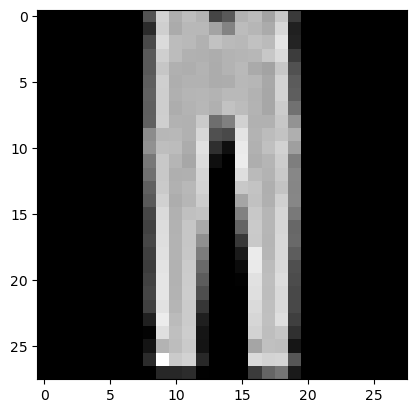

In [50]:
plt.imshow(img.squeeze(), cmap="gray")

In [51]:
rand_image_tensor = torch.randn(size=(1,28,28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

In [52]:
model2(rand_image_tensor.to(device))

conv block 1 output shape: torch.Size([8, 14, 14])
output shape of blkc 2: torch.Size([8, 7, 7])


tensor([[ 0.1570,  0.1105,  0.0402, -0.0588, -0.0516,  0.0985, -0.0470, -0.1057,
         -0.0803, -0.1339],
        [ 0.1402,  0.1161,  0.0830,  0.0080, -0.0463,  0.0364, -0.0987, -0.0609,
         -0.0287, -0.0336],
        [ 0.1452,  0.1207,  0.0601, -0.0051, -0.0457,  0.0664, -0.0892, -0.0892,
         -0.0408, -0.0761],
        [ 0.1374,  0.1126,  0.0856,  0.0067, -0.0506,  0.0350, -0.1039, -0.0591,
         -0.0295, -0.0395],
        [ 0.1342,  0.1051,  0.0773, -0.0060, -0.0563,  0.0438, -0.1001, -0.0643,
         -0.0424, -0.0485],
        [ 0.1905,  0.0927,  0.0121, -0.0757, -0.0391,  0.1478, -0.0312, -0.0922,
         -0.0897, -0.2166],
        [ 0.2400,  0.0779, -0.0094, -0.1126, -0.0364,  0.2052, -0.0043, -0.0859,
         -0.1386, -0.3054],
        [ 0.1400,  0.1182,  0.0832,  0.0070, -0.0453,  0.0360, -0.0969, -0.0608,
         -0.0283, -0.0331]], grad_fn=<AddmmBackward0>)

### 7.3 Setup Loss Function and Optimizer for CNN

In [53]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params= model2.parameters(),
                            lr = 0.01)

In [54]:
model2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

### 7.4 Training and Testing Model 2 Using Training and Testing Functions

In [55]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#train and test model
epochs = 3

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}")
    train_step(model=model2, 
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
conv block 1 output shape: torch.Size([32, 8, 14, 14])
output shape of blkc 2: torch.Size([32, 8, 7, 7])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x392 and 49x10)

In [56]:
# Create a convolutional neural network 
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, 
    hidden_units=10, 
    output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [57]:
torch.manual_seed(42)

# Create sample batch of random numbers with same size as image batch
images = torch.randn(size=(32, 3, 64, 64)) # [batch_size, color_channels, height, width]
test_image = images[0] # get a single image for testing
print(f"Image batch shape: {images.shape} -> [batch_size, color_channels, height, width]")
print(f"Single image shape: {test_image.shape} -> [color_channels, height, width]") 
print(f"Single image pixel values:\n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Single image shape: torch.Size([3, 64, 64]) -> [color_channels, height, width]
Single image pixel values:
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,

In [58]:
torch.manual_seed(42)

# Create a convolutional layer with same dimensions as TinyVGG 
# (try changing any of the parameters and see what happens)
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       stride=1,
                       padding=0) # also try using "valid" or "same" here 

# Pass the data through the convolutional layer
conv_layer(test_image) # Note: If running PyTorch <1.11.0, this will error because of shape issues (nn.Conv.2d() expects a 4d tensor as input) 

tensor([[[ 1.5396,  0.0516,  0.6454,  ..., -0.3673,  0.8711,  0.4256],
         [ 0.3662,  1.0114, -0.5997,  ...,  0.8983,  0.2809, -0.2741],
         [ 1.2664, -1.4054,  0.3727,  ..., -0.3409,  1.2191, -0.0463],
         ...,
         [-0.1541,  0.5132, -0.3624,  ..., -0.2360, -0.4609, -0.0035],
         [ 0.2981, -0.2432,  1.5012,  ..., -0.6289, -0.7283, -0.5767],
         [-0.0386, -0.0781, -0.0388,  ...,  0.2842,  0.4228, -0.1802]],

        [[-0.2840, -0.0319, -0.4455,  ..., -0.7956,  1.5599, -1.2449],
         [ 0.2753, -0.1262, -0.6541,  ..., -0.2211,  0.1999, -0.8856],
         [-0.5404, -1.5489,  0.0249,  ..., -0.5932, -1.0913, -0.3849],
         ...,
         [ 0.3870, -0.4064, -0.8236,  ...,  0.1734, -0.4330, -0.4951],
         [-0.1984, -0.6386,  1.0263,  ..., -0.9401, -0.0585, -0.7833],
         [-0.6306, -0.2052, -0.3694,  ..., -1.3248,  0.2456, -0.7134]],

        [[ 0.4414,  0.5100,  0.4846,  ..., -0.8484,  0.2638,  1.1258],
         [ 0.8117,  0.3191, -0.0157,  ...,  1

In [59]:
torch.manual_seed(42)
# Create a new conv_layer with different values (try setting these to whatever you like)
conv_layer_2 = nn.Conv2d(in_channels=3, # same number of color channels as our input image
                         out_channels=10,
                         kernel_size=(5, 5), # kernel is usually a square so a tuple also works
                         stride=2,
                         padding=0)

# Pass single image through new conv_layer_2 (this calls nn.Conv2d()'s forward() method on the input)
conv_layer_2(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 30, 30])

In [60]:
# Check out the conv_layer_2 internal parameters
print(conv_layer_2.state_dict())

OrderedDict([('weight', tensor([[[[ 0.0883,  0.0958, -0.0271,  0.1061, -0.0253],
          [ 0.0233, -0.0562,  0.0678,  0.1018, -0.0847],
          [ 0.1004,  0.0216,  0.0853,  0.0156,  0.0557],
          [-0.0163,  0.0890,  0.0171, -0.0539,  0.0294],
          [-0.0532, -0.0135, -0.0469,  0.0766, -0.0911]],

         [[-0.0532, -0.0326, -0.0694,  0.0109, -0.1140],
          [ 0.1043, -0.0981,  0.0891,  0.0192, -0.0375],
          [ 0.0714,  0.0180,  0.0933,  0.0126, -0.0364],
          [ 0.0310, -0.0313,  0.0486,  0.1031,  0.0667],
          [-0.0505,  0.0667,  0.0207,  0.0586, -0.0704]],

         [[-0.1143, -0.0446, -0.0886,  0.0947,  0.0333],
          [ 0.0478,  0.0365, -0.0020,  0.0904, -0.0820],
          [ 0.0073, -0.0788,  0.0356, -0.0398,  0.0354],
          [-0.0241,  0.0958, -0.0684, -0.0689, -0.0689],
          [ 0.1039,  0.0385,  0.1111, -0.0953, -0.1145]]],


        [[[-0.0903, -0.0777,  0.0468,  0.0413,  0.0959],
          [-0.0596, -0.0787,  0.0613, -0.0467,  0.0701],

In [61]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model 
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_2, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)
                                           

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------


KeyboardInterrupt: 

In [ ]:
# Get model_2 results 
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 2.3023061752319336,
 'model_acc': 9.994009584664537}

## 8. Comparing Model Results and Training Time


In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model name:,model loss:,model acc:,model_name,model_loss,model_acc
0,fasionMNISTModel,0.498099,82.498003,NaN,NaN,NaN
1,NaN,NaN,NaN,FashionMNISTModelV1,0.652765,75.948482
2,NaN,NaN,NaN,FashionMNISTModelV2,2.302306,9.994010


In [62]:
def make_predictions(model: torch.nn.Module,
                     data:list,
                     device: torch.device = device):
    pred_probs = []
    model.to(device)
    model.eval()
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device)

            pred_logits = model(sample)

            pred_prob = torch.softmax(pred_logits.squeeze(), dim=0)

            #move pred probs to cpu
            pred_probs.append(pred_prob.cpu())

    #stack turns list into a tensor
    return torch.stack(pred_probs)

In [66]:
import random
random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

#view first sample sehape
test_samples[0].shape, type(test_samples[0]), type(test_data[0][0])

(torch.Size([1, 28, 28]), torch.Tensor, torch.Tensor)

In [ ]:
#make predictions
pred_probs = make_predictions(model=model_2,
                              data=test_samples)

pred_probs[0]

tensor([0.1030, 0.0933, 0.1060, 0.0963, 0.0985, 0.1013, 0.0995, 0.0991, 0.1020,
        0.1010])

In [ ]:
#conver probabilities to labels
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([2, 2, 2, 2, 2, 2, 2, 2, 2])

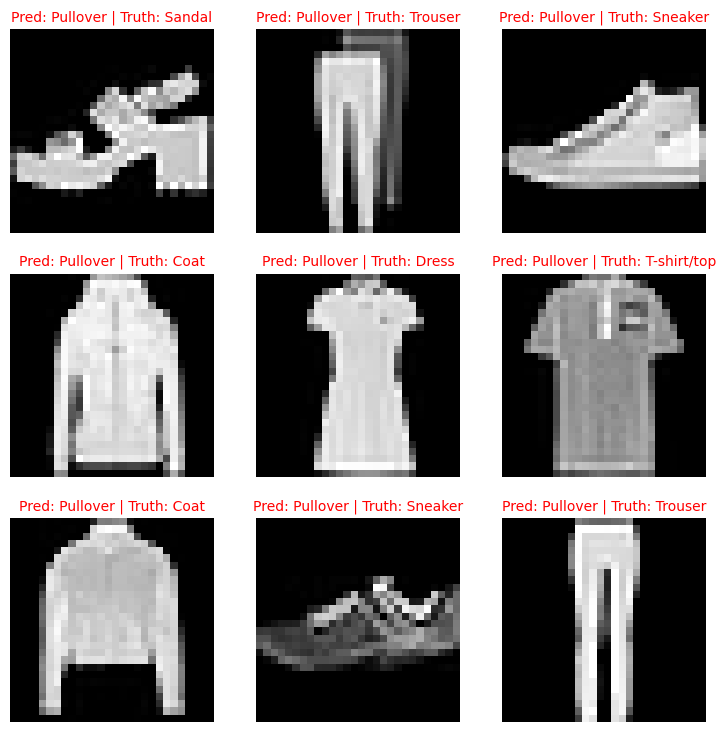

In [ ]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]] 

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  
  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);

In [ ]:
# Create a convolutional neural network 
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from: 
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape, 
                      out_channels=hidden_units, 
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number 
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units, 
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from? 
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7, 
                      out_features=output_shape)
        )
    
    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        # print(x.shape)
        x = self.block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, 
    hidden_units=10, 
    output_shape=len(class_names)).to(device)
model_2

FashionMNISTModelV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
# Setup loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), 
                             lr=0.01)

In [ ]:
torch.manual_seed(42)

# Measure time
from timeit import default_timer as timer
train_time_start_model_2 = timer()

# Train and test model 
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader, 
        model=model_2, 
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn,
        device=device
    )
    test_step(data_loader=test_dataloader,
        model=model_2,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn,
        device=device
    )

train_time_end_model_2 = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_model_2,
                                           end=train_time_end_model_2,
                                           device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 0.58730 | Train accuracy: 78.61%
Test loss: 0.39217 | Test accuracy: 85.90%

Epoch: 1
---------
Train loss: 0.36018 | Train accuracy: 87.08%
Test loss: 0.35459 | Test accuracy: 86.90%

Epoch: 2
---------
Train loss: 0.32379 | Train accuracy: 88.18%
Test loss: 0.32575 | Test accuracy: 88.18%

Train time on: cuda: 42.119240699998045 seconds


In [ ]:
# Get model_2 results 
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
)
model_2_results

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32574543356895447,
 'model_acc': 88.17891373801918}

In [ ]:
import random
random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([1, 28, 28])
Test sample label: 5 (Sandal)


In [ ]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2, 
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[1.4700e-07, 1.2698e-07, 1.3744e-07, 2.9326e-07, 3.3213e-08, 9.9976e-01,
         2.3926e-07, 2.2767e-05, 4.0419e-05, 1.7809e-04],
        [5.7751e-02, 5.8200e-01, 2.3636e-03, 2.4299e-01, 4.9156e-02, 1.8535e-04,
         6.4254e-02, 2.5637e-04, 6.8658e-04, 3.5868e-04]])

In [ ]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model_2, 
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:2]

tensor([[1.4700e-07, 1.2698e-07, 1.3744e-07, 2.9326e-07, 3.3213e-08, 9.9976e-01,
         2.3926e-07, 2.2767e-05, 4.0419e-05, 1.7809e-04],
        [5.7751e-02, 5.8200e-01, 2.3636e-03, 2.4299e-01, 4.9156e-02, 1.8535e-04,
         6.4254e-02, 2.5637e-04, 6.8658e-04, 3.5868e-04]])

In [ ]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([5, 1, 9, 4, 3, 0, 4, 7, 1])

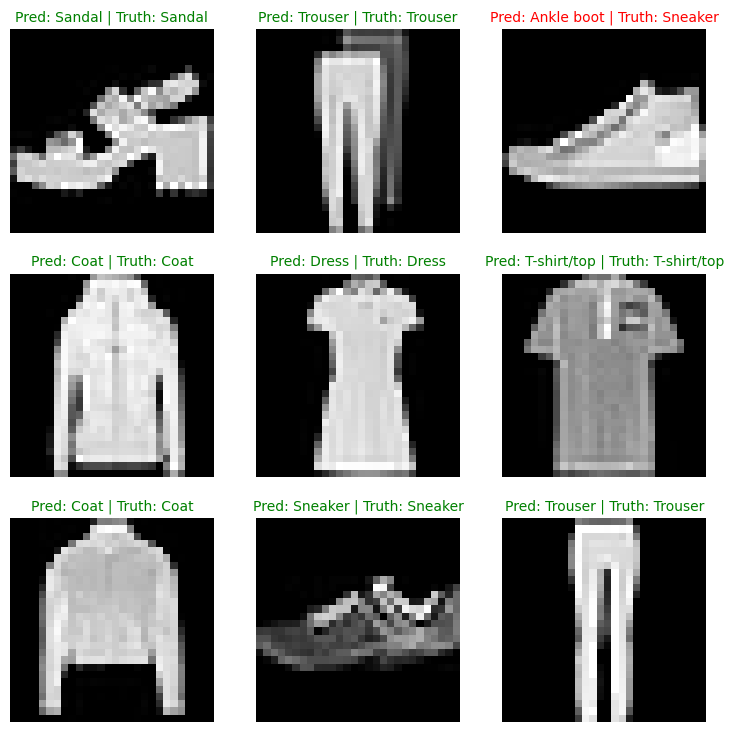

In [ ]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label (in text form, e.g. "Sandal")
  pred_label = class_names[pred_classes[i]]

  # Get the truth label (in text form, e.g. "T-shirt")
  truth_label = class_names[test_labels[i]] 

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"
  
  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);